In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV3Small, MobileNetV3Large
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D

2024-03-12 11:18:33.292954: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 11:18:33.293054: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 11:18:33.457574: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

12683000/12683000 [==============================] - 0s 0us/step


In [3]:
data_dir = "/kaggle/input/eccv-brain-mri-augmentation-manual/original_dataset/"

num_classes = 4

# Define a range for the validation split
validation_splits = [0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40]

accuracies = []

for validation_split in validation_splits:
    print(f"Training with validation split: {validation_split}")

    # Create the image dataset with the current validation split
    train_ds = tf.keras.utils.image_dataset_from_directory(
      data_dir,
      labels='inferred',
      label_mode='categorical',
      validation_split = validation_split,
      subset="training",
      seed=107,
      image_size=(224,224),
      batch_size=64
      )

    val_ds = tf.keras.utils.image_dataset_from_directory(
      data_dir,
      labels='inferred',
      label_mode='categorical',
      validation_split = validation_split,
      subset="validation",
      seed=107,
      image_size=(224,224),
      batch_size=64
      )
    earlystopping = EarlyStopping(monitor="val_loss",
                                mode="min", patience=5,
                                restore_best_weights=True)

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_ds, validation_data=val_ds, epochs=5, callbacks=[earlystopping])
    
    accuracy = history.history['val_accuracy'][-1]
    accuracies.append(accuracy)
    print(f"Overall accuracy: {accuracy}")

Training with validation split: 0.1
Found 3027 files belonging to 4 classes.
Using 2725 files for training.
Found 3027 files belonging to 4 classes.
Using 302 files for validation.
Epoch 1/5


I0000 00:00:1710242351.465421      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


43/43 [==============================] - 54s 413ms/step - loss: 0.4199 - accuracy: 0.8411 - val_loss: 2.0342 - val_accuracy: 0.6291
Epoch 2/5
43/43 [==============================] - 11s 229ms/step - loss: 0.1103 - accuracy: 0.9618 - val_loss: 3.4200 - val_accuracy: 0.6457
Epoch 3/5
43/43 [==============================] - 11s 240ms/step - loss: 0.0693 - accuracy: 0.9787 - val_loss: 1.0980 - val_accuracy: 0.8510
Epoch 4/5
43/43 [==============================] - 11s 230ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 1.7537 - val_accuracy: 0.7682
Epoch 5/5
43/43 [==============================] - 11s 239ms/step - loss: 0.0512 - accuracy: 0.9853 - val_loss: 0.7127 - val_accuracy: 0.8742
Overall accuracy: 0.8741722106933594
Training with validation split: 0.11
Found 3027 files belonging to 4 classes.
Using 2695 files for training.
Found 3027 files belonging to 4 classes.
Using 332 files for validation.
Epoch 1/5
43/43 [==============================] - 39s 351ms/step - loss: 0.1277 

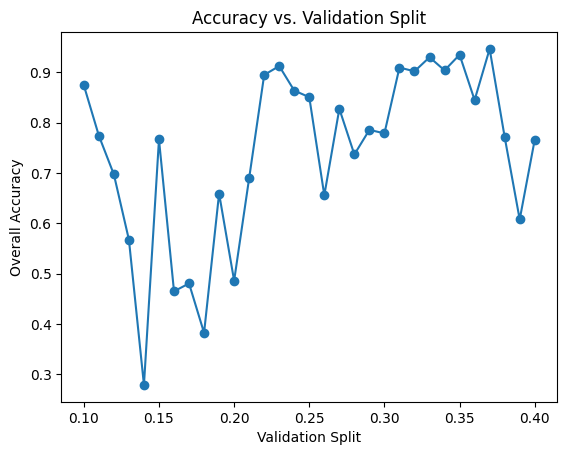

In [4]:
# Plot the accuracy vs. test size graph
plt.plot(validation_splits, accuracies, marker='o')
plt.xlabel('Validation Split')
plt.ylabel('Overall Accuracy')
plt.title('Accuracy vs. Validation Split')
plt.show()

In [5]:
# import tensorflow as tf

# model.save('/kaggle/working/cnn_original.h5')

# # Save the history to a file
# import pickle

# with open('/kaggle/working/cnn_original.pkl', 'wb') as history_file:
#     pickle.dump(history.history, history_file)

In [6]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='train_accuracy')
# plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.1, 1.2])
# plt.legend(loc='lower right')

In [7]:
# plt.plot(history.history['loss'], label='train_loss')
# plt.plot(history.history['val_loss'], label = 'validation_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.ylim([0, 6])
# plt.legend(loc='upper right')

In [8]:
# import tensorflow as tf
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# class_names = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

# all_val_labels = []
# all_val_predictions = []

# # Evaluate the model on the validation dataset batch by batch
# for batch in val_ds:
#     val_images, val_labels_batch = batch
#     val_predictions_batch = model.predict(val_images)

#     val_labels_batch = np.array(val_labels_batch)
#     val_predictions_batch = np.argmax(val_predictions_batch, axis=-1)

#     all_val_labels.extend(val_labels_batch)
#     all_val_predictions.extend(val_predictions_batch)

# # Calculate the confusion matrix for all validation data
# conf_matrix = confusion_matrix(all_val_labels, all_val_predictions)

# # Create a heatmap of the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix Heatmap (All Validation Batches)')
# plt.show()

In [9]:
# print(classification_report(all_val_labels, all_val_predictions, target_names=class_names))